<a href="https://colab.research.google.com/github/sidduvijetha/demo/blob/main/sentiment_analysis_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#sentiment analysis using LSTM

**RNN** is a type of supervised deep learning algorithm. Here, the neurons are connected to themselves through time. The idea behind RNN is to remember what information was there in the previous neurons so that these neurons could pass information to themselves in the future for further analysis. It means that the information from a specific time instance (t1) is used as an input for the next time instance(t2). This is the idea behind RNN.



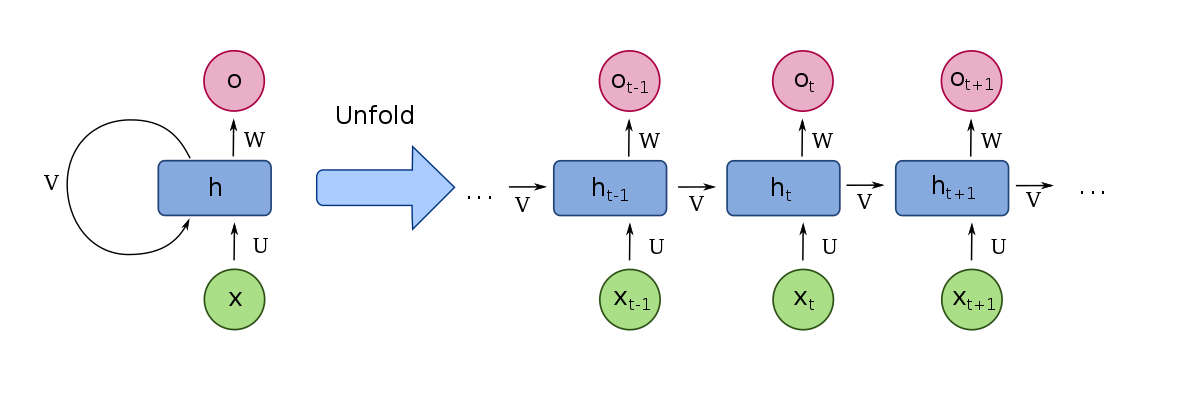

**LSTM**

LSTM is an updated version of Recurrent Neural Network to overcome the vanishing gradient problem. Below is the architecture of LSTM 

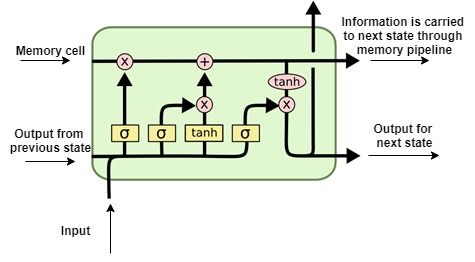

Step 1: Importing required libraries.

Step 2: Loading the dataset.

Step 3: Checking for null values in the dataset.

Step 4: Cleaning the data. It includes removing the special characters, digits, unnecessary symbols, and stop words. Also, it is required to convert the words to their root form for easy interpretation.

Step 5: Visualizing the common words in the reviews. The size of each word represents its frequency of occurrence in the data.

Step 6: Encoding the target variable using ‘Label Encoder’ from the ‘sklearn’ library.

Step 7: Tokenizing and converting the reviews into numerical vectors.

Step 8: Building the LSTM model using the ‘Keras’ library. This step involves model initialization, adding required LSTM layers, and model compilation

Step 9: Splitting the data into training and testing data.

Step 10: Training the model using training data.

Step 11: Evaluating the model.


**Step 1**: Importing required libraries.

In [2]:
# Importing required libraries
import nltk
import pandas as pd
from nltk.corpus import stopwords
from textblob import Word
from sklearn.preprocessing import LabelEncoder
from collections import Counter
import wordcloud
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt

In [3]:
!pip install kaggle

In [4]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [5]:
!cp kaggle.json ~/.kaggle/

In [6]:
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

imdb-dataset-of-50k-movie-reviews.zip: Skipping, found more recently modified local copy (use --force to force download)


**Step 2:** Loading the dataset.

In [8]:
url='/content/imdb-dataset-of-50k-movie-reviews.zip'

In [9]:
df=pd.read_csv(url)

In [10]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


**Step 3:** Checking for null values in the dataset.



In [11]:
#Check if there are any null values
data_v1= df[['review','sentiment']]
data_v1.isnull().sum()

review       0
sentiment    0
dtype: int64

**Step 4:** Cleaning the data. It includes removing the special characters, digits, unnecessary symbols, and stop words. Also, it is required to convert the words to their root form for easy interpretation.

In [12]:
import nltk
nltk.download('stopwords')
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [13]:
def cleaning(df, stop_words):
    df['review'] = df['review'].apply(lambda x:' '.join(x.lower() for x in x.split()))
    # Replacing the special characters
    df['review'] = df['review'].str.replace('[^ws]', '')
    # Replacing the digits/numbers
    df['review'] = df['review'].str.replace('d', '')
    # Removing stop words
    df['review'] = df['review'].apply(lambda x:' '.join(x for x in x.split() if x not in stop_words))
    # Lemmatization
    df['review'] = df['review'].apply(lambda x:' '.join([Word(x).lemmatize() for x in x.split()]))
    return df
stop_words = stopwords.words('english')
data_v1 = cleaning(data_v1, stop_words)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


**Step 5:** Visualizing the common words in the reviews. The size of each word represents its frequency of occurrence in the data.

In [14]:
common_words=''
for i in data_v1.review:
    i = str(i)
    tokens = i.split()
    common_words += " ".join(tokens)+" "

**Step 6:** Encoding the target variable using ‘Label Encoder’ from the ‘sklearn’ library.

In [15]:
# Encoded the target column
lb=LabelEncoder()
data_v1['sentiment'] = lb.fit_transform(data_v1['sentiment'])

**Step 7:** Tokenizing and converting the reviews into numerical vectors.

In [16]:
tokenizer = Tokenizer(num_words=500, split=' ') 
tokenizer.fit_on_texts(data_v1['review'].values)
X = tokenizer.texts_to_sequences(df['review'].values)
X = pad_sequences(X)

**Step 8:** Building the LSTM model using the ‘Keras’ library. This step involves model initialization, adding required LSTM layers, and model compilation

In [17]:
model = Sequential()
model.add(Embedding(500, 120, input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(176, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 12, 120)           60000     
                                                                 
 spatial_dropout1d (SpatialD  (None, 12, 120)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 176)               209088    
                                                                 
 dense (Dense)               (None, 2)                 354       
                                                                 
Total params: 269,442
Trainable params: 269,442
Non-trainable params: 0
_________________________________________________________________
None


**Step 9:** Splitting the data into training and testing data.

In [18]:
#Splitting the data into training and testing
y=pd.get_dummies(data_v1['sentiment'])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

**Step 10:** Training the model using training data.

In [19]:
batch_size=32
model.fit(X_train, y_train, epochs = 5, batch_size=batch_size, verbose = 'auto')

Epoch 1/5
1094/1094 [==============================] - 79s 68ms/step - loss: 0.6936 - accuracy: 0.4988
Epoch 2/5
1094/1094 [==============================] - 69s 63ms/step - loss: 0.6932 - accuracy: 0.4976
Epoch 3/5
1094/1094 [==============================] - 68s 62ms/step - loss: 0.6932 - accuracy: 0.5015
Epoch 4/5
1094/1094 [==============================] - 73s 67ms/step - loss: 0.6932 - accuracy: 0.4985
Epoch 5/5
1094/1094 [==============================] - 70s 64ms/step - loss: 0.6931 - accuracy: 0.5016


**Step 11:** Evaluating the model

In [21]:
model.evaluate(X_test,y_test) 

469/469 [==============================] - 5s 10ms/step - loss: 0.6932 - accuracy: 0.5058


[0.6932389736175537, 0.5058000087738037]